# Ford GoBike System Data
## by Abdelrhman Hamdy 

## Preliminary Wrangling

> Metro Bike Share trip data consist of about 900,000 rows and 15 featrues. through this project we need to answer 2 questions : <br>
1- who use our service more ? <br>
2- who use our service longer ? 

In [88]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [89]:
df=pd.read_csv('201902-citibike-tripdata.csv')

In [90]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,3494.0,E 115 St & Lexington Ave,40.797911,-73.942300,3501.0,E 118 St & Madison Ave,40.801487,-73.944251,33450,Subscriber,1989,1
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,438.0,St Marks Pl & 1 Ave,40.727791,-73.985649,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,25626,Subscriber,1990,1
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,3571.0,Bedford Ave & Bergen St,40.676368,-73.952918,3549.0,Grand Ave & Bergen St,40.678045,-73.962408,35568,Subscriber,1987,1
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,167.0,E 39 St & 3 Ave,40.748901,-73.976049,477.0,W 41 St & 8 Ave,40.756405,-73.990026,25045,Subscriber,1964,2
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,3458.0,W 55 St & 6 Ave,40.763094,-73.978350,3443.0,W 52 St & 6 Ave,40.761330,-73.979820,34006,Subscriber,1979,1


In [91]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           9
start station name         9
start station latitude     0
start station longitude    0
end station id             9
end station name           9
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [92]:
df.shape

(943744, 15)

In [93]:
df.dropna(inplace=True)

In [94]:
# this attributes in usless in may investigation
df.drop(['start station latitude','start station longitude', 'end station id','start station id','end station name',
       'end station latitude', 'end station longitude','start station name'],axis=1,inplace=True)

In [95]:
df.head()

,tripduration,starttime,stoptime,bikeid,usertype,birth year,gender
0,219,2019-02-01 00:00:06.2570,2019-02-01 00:03:46.1090,33450,Subscriber,1989,1
1,143,2019-02-01 00:00:28.0320,2019-02-01 00:02:51.7460,25626,Subscriber,1990,1
2,296,2019-02-01 00:01:13.9870,2019-02-01 00:06:10.7340,35568,Subscriber,1987,1
3,478,2019-02-01 00:01:14.1520,2019-02-01 00:09:12.7870,25045,Subscriber,1964,2
4,225,2019-02-01 00:01:49.3410,2019-02-01 00:05:34.4980,34006,Subscriber,1979,1


In [96]:
# see youngest and oldest users
df['birth year'].max(),df['birth year'].min()


(2003, 1885)

In [97]:
df.gender.value_counts() # see numbers of different genders

1    703455
2    203512
0     36768
Name: gender, dtype: int64

In [98]:
df.usertype.value_counts() # see numbers of user types

Subscriber    897386
Customer       46349
Name: usertype, dtype: int64

In [99]:
# convert start and stop time to data time
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943735 entries, 0 to 943743
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   tripduration  943735 non-null  int64         
 1   starttime     943735 non-null  datetime64[ns]
 2   stoptime      943735 non-null  datetime64[ns]
 3   bikeid        943735 non-null  int64         
 4   usertype      943735 non-null  object        
 5   birth year    943735 non-null  int64         
 6   gender        943735 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 57.6+ MB


In [101]:
# extracting hour, day, month, year, and age of users 
df['hour'] = df.starttime.dt.hour
df['day'] = df.starttime.dt.day_name()
df['month'] = df.starttime.dt.month
df['year'] = df.starttime.dt.year
df['age'] =df.year - df['birth year']

In [102]:
df.head()

,tripduration,starttime,stoptime,bikeid,usertype,birth year,gender,hour,day,month,year,age
0,219,2019-02-01 00:00:06.257,2019-02-01 00:03:46.109,33450,Subscriber,1989,1,0,Friday,2,2019,30
1,143,2019-02-01 00:00:28.032,2019-02-01 00:02:51.746,25626,Subscriber,1990,1,0,Friday,2,2019,29
2,296,2019-02-01 00:01:13.987,2019-02-01 00:06:10.734,35568,Subscriber,1987,1,0,Friday,2,2019,32
3,478,2019-02-01 00:01:14.152,2019-02-01 00:09:12.787,25045,Subscriber,1964,2,0,Friday,2,2019,55
4,225,2019-02-01 00:01:49.341,2019-02-01 00:05:34.498,34006,Subscriber,1979,1,0,Friday,2,2019,40


In [103]:
#see the collected was in which months
df.month.min(),df.month.max()


(2, 2)

### What is the structure of your dataset?

> (943744, 15)

### What is/are the main feature(s) of interest in your dataset?

> attributes associated with high number of service usage  
> Duration of Trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  hour , day, month,  gender, type of user, age

## Univariate Exploration

### what are the ages of users, and how frequently they use the service ?

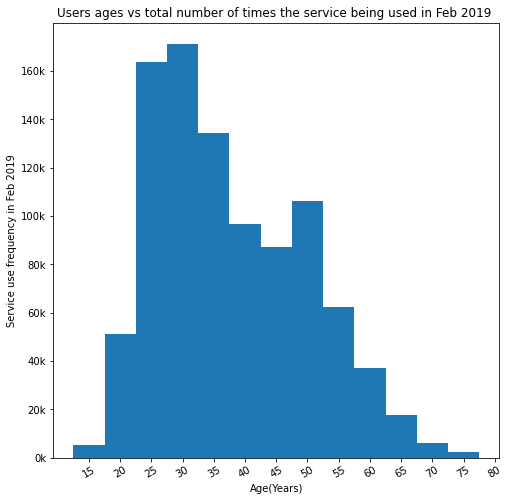

In [104]:
# specify the bins of the histogram to have 5 years in each bin 
bins=np.arange(15 ,80 + 5 , 5) # the yougest user in the dataset is 15 years, and tha oldest user is 80 years
bins_y=np.arange(0,180000,20000)
bins_y_label = ['{:0.0f}'.format(v) + "k" for v in bins_y/1000]

plt.figure(figsize=[8,8])

plt.hist(df['age'],bins=bins)

plt.xticks(bins+2.5,bins,rotation=30); # i added 2.5 to move x values to be in the center of each bar 

plt.yticks(bins_y,bins_y_label)

plt.title('Users ages vs total number of times the service being used in Feb 2019 ');

plt.xlabel('Age(Years)');

plt.ylabel('Service use frequency in Feb 2019');

**the most ages that use the bike-share service are betweem 25 ~ 35.
the point that should work on that ages from 15 to 20 is low and need extra work to bring them. 
in Bivariate Exploration i want to see if age asscoiated with trip duration, user type, or gender**

### What is the percentage of each gender  ? 

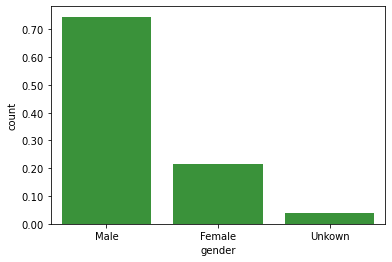

In [105]:

bi=np.arange(0,0.8,0.1) # creating the percentage of each gender of y axis
bi_label = ['{:0.2f}'.format(v) for v in bi] # creating the labels of y axis

order=df.gender.value_counts().index #creating variable to order the bar graph from highest to lowest 

sb.countplot(data=df,x='gender',order=order,color=sb.color_palette()[2])
plt.xticks([0,1,2],['Male','Female','Unkown'])
plt.yticks(bi*df.shape[0],labels=bi_label);

**there are some entries with unknown gender. majoirty of users are men with 74% !! against 21% of women, this seems very large difference .
in Bivariate Exploration i want  to see if this huge difference in prcentage related with age, maybe that there are paraticualr ranges of age in men use the servie more than women, also want to see coresponding avgerage trip duration with each gender. last thing want to invetigate if a particular  gender tend to be certain type of user**

### How does the service demand change during the day?

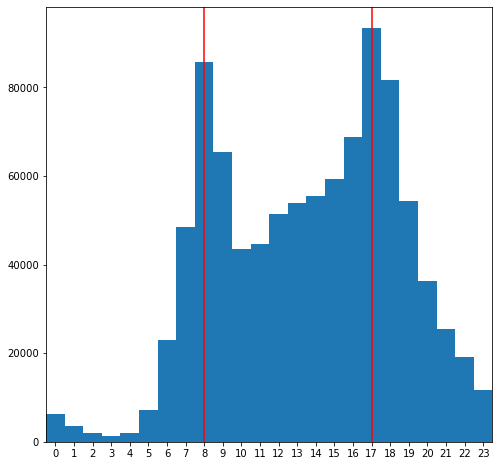

In [106]:
# total number of times the service used in each hour in the day 
bins=np.arange(0,25,1) # define the bins here to represent the hours of day

plt.figure(figsize=[8,8])

plt.hist(df['hour'],bins=bins)

plt.xticks(bins+0.5,bins);

plt.xlim((0,24))

# highlighting the rush hours
plt.axvline(8.5,color='red') 
plt.axvline(17.5,color='red')

**the graph shows that the rush hours in which the service being used is when people go and return from their work. In Bivariate Exploration i want to see if the trip duration vary during the day**

### What do the majority of users prefer, use the service as customers or subscribers?

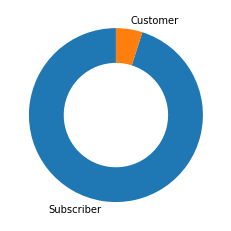

In [107]:
plt.pie(df.usertype.value_counts(),labels=df.usertype.value_counts().index,startangle=90,wedgeprops = {'width' : 0.4});

**majority of users type are subsribers. but, is the average duration of the trip of subscriber longer than customers? . also what is the most day and hour that both users use the service ? . is user type related with user age, which means that certain range of ages tend to use the service as customer but not as subscriber ? . is gender effect the user type?**

### What is the distribution of trip durations ? 

<ipython-input-108-ec1936b4469d>:10: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((0,5000))


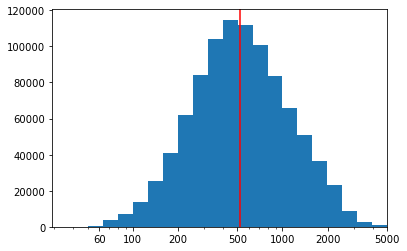

In [108]:
#trip duration histogram through all dataset
binss = 10**np.arange(1.7,6.5,0.1) # defining the bins of the log x axis 

plt.hist(df.tripduration,bins=binss)

plt.xscale('log') # converting x axis to log scale

plt.xticks([60,100,200,500,1000,2000,5000,10000],[60,100,200,500,1000,2000,5000,10000])

plt.xlim((0,5000))

plt.axvline(df.tripduration.median(),color='red') # highlight the median

**there are outliers after 5000 seconds which effect my visualization, so i just dropped values after 5000s as it just represent 0.002% of data . i will not go through the reason of existence of these outliers in that project but i've made a quick investigation and found some attributes asscoiated wit these oultliers :**

**gende : men or unknown repesent about  80 %  
usertype : cutomsers increased from 5% -in all dataset- to  51% in outliers <br>
day : saturday and sunday is the most two days in which outliers can happen <br>
users age : 50 ~ 55 is <br>
and the followig set of cells will go through creation of these stastics**


In [109]:
#creating the outliers dataframe
outliers=df[df.tripduration > 5000]

In [110]:
#see the percentage of outliers to the whole dataset
outliers.shape[0] / df.shape[0]

0.0027740838264979045

In [111]:
# percentage of men and unknown gender in outlliers
(outliers.gender != 2).sum() / outliers.shape[0]

0.8009931245225362

In [112]:
#the percentage of Customers in the outliers
(outliers.usertype == "Customer").sum() / outliers.shape[0]

0.511459129106188

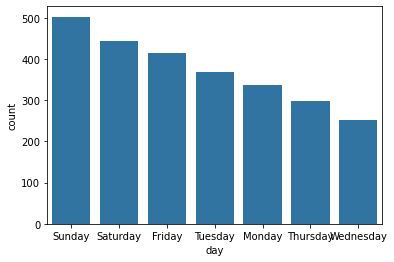

In [113]:
# number of outliers in each day in  a week
sb.countplot(outliers.day,color=sb.color_palette()[0],order =outliers.day.value_counts().index)

Text(0.5, 0, 'age')

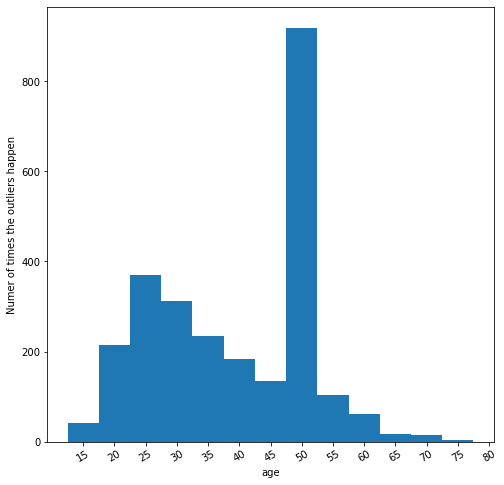

In [114]:
# the number of outliers in each age bin
bins=np.arange(15,80+5,5)

plt.figure(figsize=[8,8])

plt.hist(outliers['age'],bins=bins)

plt.xticks(bins+2.5,bins,rotation=30);

plt.ylabel('Numer of times the outliers happen')
plt.xlabel('age')

#### this was brief invetigation on outliers . Let's continue our univariate investigation :D

### How does the service demand change during the week?

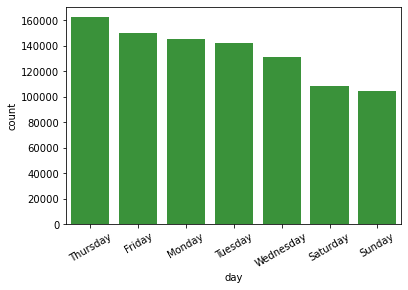

In [115]:
# bar plot of days in the week against number of times the service used 
order = df.day.value_counts().index # ordering the values of the bar chart from highest to lowest

sb.countplot(data=df,x='day',order=order,color=sb.color_palette()[2])
plt.xticks(rotation=30);

**this graph obviously tells that on workdays people use the service more than on weekends.
in bivariate I will see the relation between days vs trip duration to see if in a certain day users tend to use the service longer. days vs users type to see which days customers and subscribers tends to use the service more** 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the age of users perform right-skewed curve which is the number of times the service used decreases as the age increase and our majority users lay between 25 ~ 35 .majority of users are Subscribers with 95%. the usage of our service reaches the maximum in particular hours: 8 A.M, 15 P.M, and 6 P.M.there are gender bias here with 74 % of users are men .trip duration has a long distribution so that i made a log transform of it. the busiest days are Thursday and Friday. and the lowest usage is on Sunday


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i dropped all rows that have duration > 5000 seconds because they are outliers and represent just 0.002 % of my data. i made a quick investigation and I found  some attributes associated with these outliers<br>
age: 50 ~55 <br>
gender: men or unknown <br>
day: Saturday <br>
user: customer <br>

> i dropped years before 1940 because they effect my visualizations. i think they are typos or very limited number of these ages using the service 

## Bivariate Exploration

In [116]:
dfn=df.query('tripduration <= 5000') # creating new dataframe after dropping outliers
dfn = dfn[dfn['birth year'] >= 1940] # drooping all outliers or type in ages

dfn.to_csv('Cleaned data.csv',index=False) # save cleaned data to use in slide_dick

### Does  a certain gender have  a longer average duration trip than the other ?


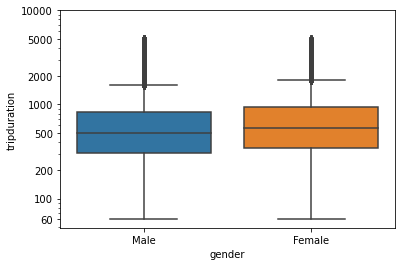

In [117]:
temp= dfn.query('gender != 0 ') # filtering the entries that have unknown gender type

sb.boxplot(data=temp,x='gender',y='tripduration') 

plt.yscale('log') # converting y axis to log scale

plt.xticks([0,1],['Male','Female']) # the gender encoded in the dataser as 1 for male , 2 for women so here
                                    # i'm changing this label to male and female

plt.yticks([60,100,200,500,1000,2000,5000,10000],[60,100,200,500,1000,2000,5000,10000]);

#### so women's trip duration is slightly longer than male 

### Does  the user type effect average trip duration ?

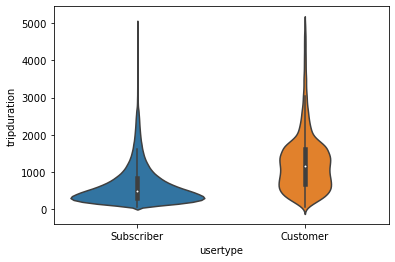

In [118]:
sb.violinplot(data=dfn,x='usertype',y='tripduration')

**this shows that cutsomers use the service longer than subscribers.** 

### Does the average  trip duration change during the days of week ? 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

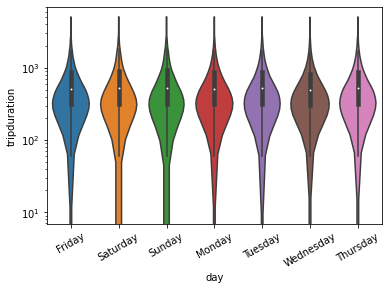

In [119]:
sb.violinplot(data=dfn,x='day',y='tripduration')

plt.yscale('log')

plt.xticks(rotation=30)

**so according to this plot , the day dosen't effect so much in the duration of serivce**

### Does the average  trip duration change during the day ? 

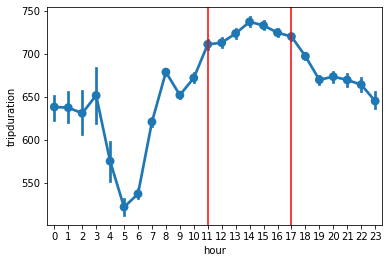

In [120]:
sb.pointplot(data=dfn,x='hour',y='tripduration')

#highlighting the interval of peak hours
plt.axvline(11,color='red')
plt.axvline(17,color='red')

**from 11 ~ 17 there is a noticable increase in duration service  to be more that 700 s**

### Does the age of the user effect  trip duration ?

(500.0, 900.0)

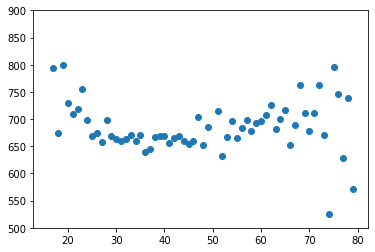

In [121]:
d=dfn.groupby('age')['tripduration'].mean() # calculating the average trip duraion of each user age
plt.scatter(x=d.index,y=d.values)
plt.ylim((500,900))

**according to that plot there isn't colrrelation between ages and the duration** 

### what is the user type that each gender prefer to be?

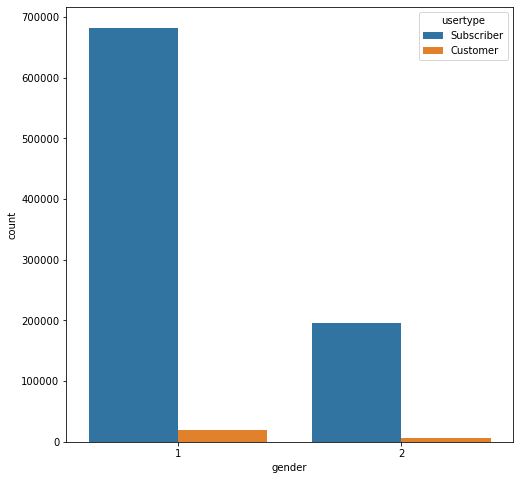

In [122]:
plt.figure(figsize=(8,8))

sb.countplot(data = dfn.query('gender!=0'), x = 'gender', hue = 'usertype')


**from this graph both gender like to use the service as subscribers more than customers**

### which is the user type that young and old users prefer when they use the service ? 

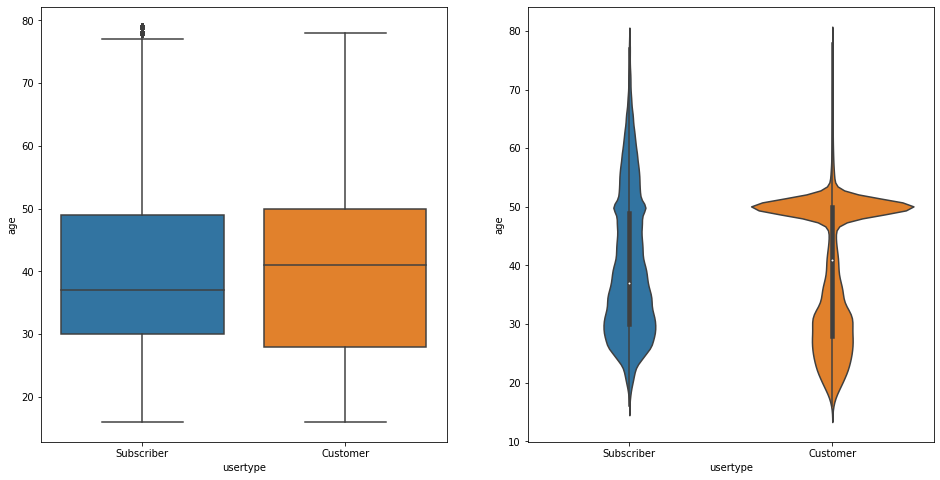

In [123]:
plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
sb.boxplot(data=dfn,x='usertype',y='age')

plt.subplot(1,2,2)
sb.violinplot(data=dfn,x='usertype',y='age')

**so there is a relation between customers and older people espically in 50s . this insight can help us to produce marketing campign with target audience in 50s to convert more customers to subscribers**

### what is the day that each user type use the service most in ?

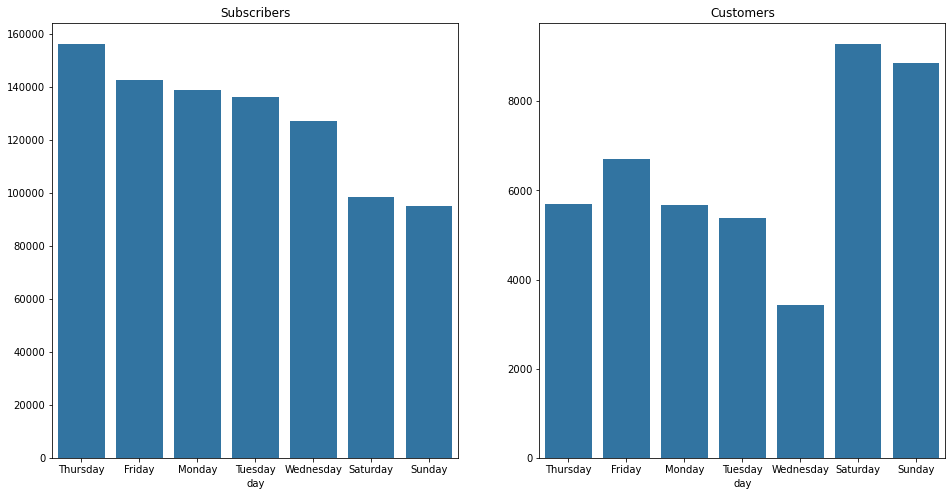

In [124]:
x=dfn.groupby(['usertype','day']).count()['tripduration'].sort_values(ascending=False)
x =x.reset_index(name='duartion')
x = x.pivot(index='day',columns='usertype',values='duartion')
x.sort_values('Subscriber',ascending=False,inplace=True)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sb.barplot(x=x.Subscriber.index,y=x.Subscriber.values,color=sb.color_palette()[0])
plt.title("Subscribers")
plt.subplot(1,2,2)
sb.barplot(x=x.Customer.index,y=x.Customer.values,color=sb.color_palette()[0])
plt.title("Customers");

#### so accoring to these graphs customers use the service in weekends more than other days ,in constrat subscribers  use the service more in weekdays

### Is  there a certain age in which more men or women like to use the service more than the other gender ?

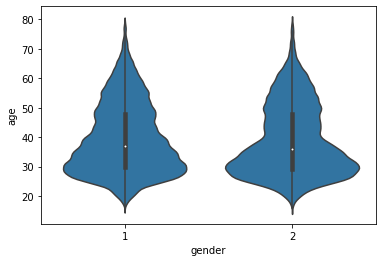

In [125]:
dataset_without_unknown = dfn.query('gender !=0') # in the dataset there are some entries with unknown gender 
sb.violinplot(data=dataset_without_unknown,x='gender',y='age',color=sb.color_palette()[0])

**next graph show that distribtuion of men and women that use bikes are similar to each other which assure that the age isn't a factor here**   

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>through bivariate exploration i drew all feature with duration to understand if there a relation between any feature and the duration, and I found that even that customer don't use our service a lot, if they used, they tend to use it longer than subscribers. also, I found that even males use our service more , if females decided to ride a bike it tends to be longer. there is increasing in trip duration between 11 to  17 hours with an average of more than 700 s .

>  there isn't a specific day that users tend to use our service longer on. also, I tried to see if age affects the duration of service but according to the plot, it doesn't have a correlation.


> Customers use the service more on weekends (Saturday-Sunday) but subscribers use the service more on weekdays

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


> last thing a tried toa

> older people tends to use the service as customers not subscribers

## Multivariate Exploration


### Is the average trip duration of women longer than men in all user types ?

([<matplotlib.axis.XTick at 0x7f08a103a040>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

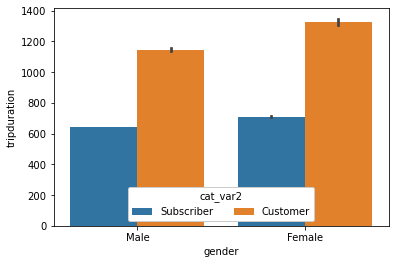

In [126]:
#creating  bar plot with gender ,user type against average trip duration 

ax = sb.barplot(data = dataset_without_unknown , x = 'gender', y = 'tripduration', hue =  'usertype')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
plt.xticks([0,1],['Male','Female'])

**that ensure the bivariate visualization that even subscribers and men use the service more than customers and women when customers or women use the service they tend to use it longer**

### what is the variation of average trip duration along the day for both users type ?
### what is the variation of average trip duration along the week for both users type ?

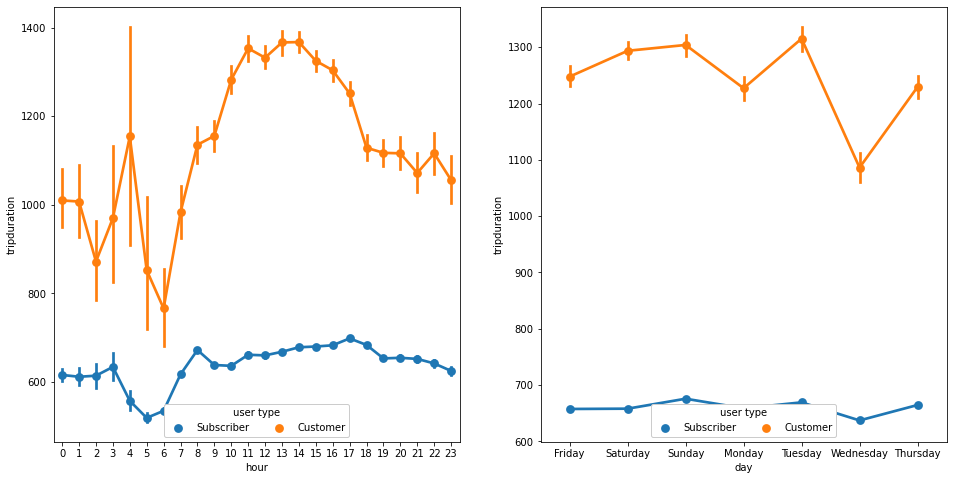

In [127]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
ax = sb.pointplot(data = dfn, x = 'hour', y = 'tripduration', hue =  'usertype')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user type') # putting legend


plt.subplot(1,2,2)
ax = sb.pointplot(data = dfn, x = 'day', y = 'tripduration', hue =  'usertype')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user type')# putting legend

**this mean that if a customer use the service in any day or hour , he/she will use it longer than a subscriber
and this assure the previous bivariate visualsations**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Cutomers and women tend to use the service Longer than subscribers and men at any time

>   as people getting  older,  they use the service with shorter duraion 
